#**Lab Assignment No 1: Image Resizing and Interpolation**

In [0]:
#Code Belongs to RAJAT KHANNA (2017UCS0050)
#IMPORTING LIBRARIES
import pandas as pd
from  matplotlib.image import imread
import matplotlib.pyplot as plt

In [0]:
import PIL 
from PIL import Image
import numpy as np
import cv2

*Find the attached database of standard test images and select the gray scale
‘lena_gray_512.tif’ image of dimension pixels. Perform the following operations.*

In [0]:
#LINKING COLAB TO DRIVE
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
filename = "/content/drive/My Drive/standard_test_images/lena_gray_512.tif"

In [0]:
img = imread(filename)

# **Resizing 512 to 256**
*(a) Reduce the image size by downsampling to , name this image as
‘reduce_lena_256.tif’.*


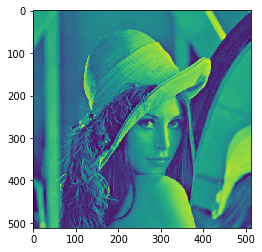

In [0]:
plt.imshow(img)

In [0]:
img = Image.open(filename)

In [0]:
#Original GrayScaleImage of 512X512
imgcv = cv2.imread(filename)

In [0]:
#Resizing Image using OpenCV 512X512 ---> 256X256
img2cv = cv2.resize(imgcv,(256,256)) 

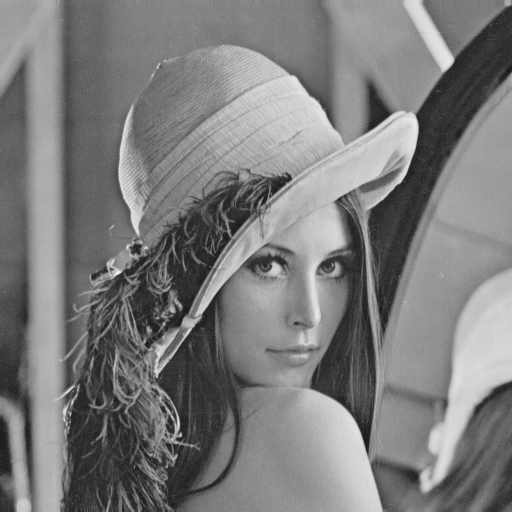

In [0]:
img

In [0]:
#Resizing Image using Image
img2 = img.resize((256,256))  

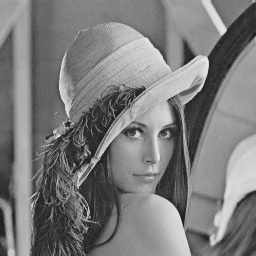

In [0]:
img2

In [0]:
#Ressized Image using openCV
img2cv   

array([[[162, 162, 162],
        [162, 162, 162],
        [160, 160, 160],
        ...,
        [169, 169, 169],
        [171, 171, 171],
        [142, 142, 142]],

       [[162, 162, 162],
        [162, 162, 162],
        [160, 160, 160],
        ...,
        [169, 169, 169],
        [171, 171, 171],
        [142, 142, 142]],

       [[163, 163, 163],
        [159, 159, 159],
        [160, 160, 160],
        ...,
        [158, 158, 158],
        [151, 151, 151],
        [116, 116, 116]],

       ...,

       [[ 51,  51,  51],
        [ 51,  51,  51],
        [ 54,  54,  54],
        ...,
        [ 81,  81,  81],
        [ 93,  93,  93],
        [ 92,  92,  92]],

       [[ 45,  45,  45],
        [ 49,  49,  49],
        [ 51,  51,  51],
        ...,
        [ 93,  93,  93],
        [102, 102, 102],
        [ 98,  98,  98]],

       [[ 44,  44,  44],
        [ 53,  53,  53],
        [ 51,  51,  51],
        ...,
        [101, 101, 101],
        [102, 102, 102],
        [107, 107, 107]]

## **PSNR value**
*(b) Compare the reduced image ‘reduced_lena_256.tif’with the given image in the database
‘lena_gray_256.tif’ by finding the PSNR values between them. Also plot the image showing
MSE difference for the same.*

In [0]:
filename2 = "/content/drive/My Drive/standard_test_images/lena_gray_256.tif"

In [0]:
#Original GrayScaleImage of Lena of 256X256
imgorigcv = cv2.imread(filename2)

In [0]:
#Printing the Matrix of the GrayScaleImage of Lena
imgorigcv

array([[[162, 162, 162],
        [162, 162, 162],
        [162, 162, 162],
        ...,
        [168, 168, 168],
        [171, 171, 171],
        [155, 155, 155]],

       [[162, 162, 162],
        [162, 162, 162],
        [162, 162, 162],
        ...,
        [168, 168, 168],
        [171, 171, 171],
        [155, 155, 155]],

       [[162, 162, 162],
        [162, 162, 162],
        [162, 162, 162],
        ...,
        [168, 168, 168],
        [171, 171, 171],
        [155, 155, 155]],

       ...,

       [[ 48,  48,  48],
        [ 57,  57,  57],
        [ 54,  54,  54],
        ...,
        [ 75,  75,  75],
        [ 97,  97,  97],
        [ 88,  88,  88]],

       [[ 46,  46,  46],
        [ 50,  50,  50],
        [ 52,  52,  52],
        ...,
        [ 89,  89,  89],
        [100, 100, 100],
        [ 98,  98,  98]],

       [[ 44,  44,  44],
        [ 55,  55,  55],
        [ 54,  54,  54],
        ...,
        [ 97,  97,  97],
        [100, 100, 100],
        [105, 105, 105]]

In [0]:
import numpy 
import math
import cv2

#computing the PSNR values - peak signal-to-noise ratio
#Since denominator contains the MSE, higher the PSNR value better the image quality
def psnr(img1, img2):
    mse = numpy.mean( (img1 - img2) ** 2 )
    if mse == 0:
      return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

d=psnr(imgorigcv,img2cv)
print(d)

34.67276146096948


In [0]:
#Computing the mean square error of both Images
def mse(img1 ,img2 ):
  return np.mean((img1-img2)**2)

In [0]:
#Compare Function To plot both the images along with the MSE value
def compare_images(imageA, imageB, title):
	m = mse(imageA, imageB)
 
	fig = plt.figure(title)
	plt.suptitle("MSE: %.2f" % m)
 
	ax = fig.add_subplot(1, 2, 1)
	plt.imshow(imageA, cmap = plt.cm.gray)
	plt.axis("off")
 
	ax = fig.add_subplot(1, 2, 2)
	plt.imshow(imageB, cmap = plt.cm.gray)
	plt.axis("off")
 
	plt.show()

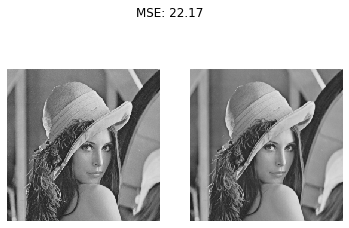

In [0]:
#Original GrayScaleImage of Lena 256X256 & Reduced GrayScaleImage of Lena from 512X512 to 256X256
compare_images(imgorigcv,img2cv,'Compare')

# **Interpolation**
*(c) Now again resize the computed image ‘reduced_lena_256.tif’ to original
dimension pixel using these methods:*

*  *Nearest Neighbour Interpolation*
*  *Bilinear Interpolation*
*  *Bicubic Interpolation (bonus)*

*(d) Compute the PSNR values between the original image and the resized image (both of
dimension pixels) obtained after methods suggested in step (c). Also plot the
MSE difference image. *italicized text*





## **Using** **Libraries**

In [0]:
#NEAREST NEIGHBOUR
imgInterpolatedNn = cv2.resize(img2cv,(512,512),interpolation=cv2.INTER_NEAREST)

In [0]:
#MSE of NEAREST NEIGHBOUR
mse(imgInterpolatedNn,imgcv)

20.81644058227539

In [0]:
#PSNR value of NEAREST NEIGHBOUR
d=psnr(imgInterpolatedNn,imgcv)
print(d)

34.94673889662211


In [0]:
#BILINEAR INTERPOLATION
imgInterpolatedLin = cv2.resize(img2cv,(512,512),interpolation=cv2.INTER_LINEAR)

In [0]:
#MSE of BILINEAR INTERPOLATION
mse(imgInterpolatedLin,imgcv)

19.546016693115234

In [0]:
#PSNR value of BILINEAR INTERPOLATION
d=psnr(imgInterpolatedLin,imgcv)
print(d)

35.220220955278364


In [0]:
#BICUBIC INTERPOLATION
imgInterpolatedCUB = cv2.resize(img2cv,(512,512),interpolation=cv2.INTER_CUBIC)

In [0]:
#MSE of BICUBIC INTERPOLATION
mse(imgInterpolatedCUB,imgcv)

15.628536224365234

In [0]:
#PSNR value of BICUBIC INTERPOLATION
d=psnr(imgInterpolatedLin,imgcv)
print(d)

35.220220955278364


##**Implemented Functions**


*NEAREST NEIGHBOUR*

In [0]:
from math import floor

In [0]:
#NEAREST NEIGHBOUR IMPLEMENTATAION
lenaCodeNearestNeighbour = np.zeros((512,512,3))

#LOOPING OVER PIXELS OF NEW IMAGE & TAKING VALUES FROM PIXELS OF REDUCED IMAGE'S NN i.e FLOOR(X/2)
for row in range(512):
  for col in range(512):
    for k in range(3):
      lenaCodeNearestNeighbour[row][col][k] = img2cv[floor(row/2)][floor(col/2)][k]

lenaCodeNearestNeighbour

array([[[162., 162., 162.],
        [162., 162., 162.],
        [162., 162., 162.],
        ...,
        [171., 171., 171.],
        [142., 142., 142.],
        [142., 142., 142.]],

       [[162., 162., 162.],
        [162., 162., 162.],
        [162., 162., 162.],
        ...,
        [171., 171., 171.],
        [142., 142., 142.],
        [142., 142., 142.]],

       [[162., 162., 162.],
        [162., 162., 162.],
        [162., 162., 162.],
        ...,
        [171., 171., 171.],
        [142., 142., 142.],
        [142., 142., 142.]],

       ...,

       [[ 45.,  45.,  45.],
        [ 45.,  45.,  45.],
        [ 49.,  49.,  49.],
        ...,
        [102., 102., 102.],
        [ 98.,  98.,  98.],
        [ 98.,  98.,  98.]],

       [[ 44.,  44.,  44.],
        [ 44.,  44.,  44.],
        [ 53.,  53.,  53.],
        ...,
        [102., 102., 102.],
        [107., 107., 107.],
        [107., 107., 107.]],

       [[ 44.,  44.,  44.],
        [ 44.,  44.,  44.],
        [ 53.,  

In [0]:
#Calculating MSE of Interpolated and original 512X512 Image
mse(lenaCodeNearestNeighbour,imgcv)

45.43753433227539

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


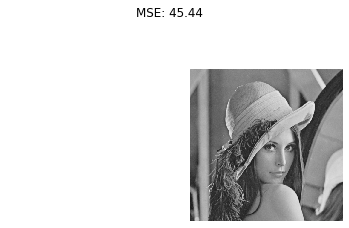

In [0]:
#Comparing Interpolated and original 512X512 Image
compare_images(lenaCodeNearestNeighbour, imgcv,'Compare')

*BILINEAR INTERPOLATION*

[Bilinear Interpolation Blog](https://theailearner.com/2018/12/29/image-processing-bilinear-interpolation/)

In [0]:
#BILINEAR INTERPOLATION
#Bi-linear interpolation means applying a linear interpolation in two directions. Thus, it uses 4 nearest neighbors, takes their weighted average to produce the output
def bilinear(img):
    #Doubling Height and Width 256-->512
    h,w=img.shape[0],img.shape[1]
    h_interpol = 2*h
    w_interpol = 2*w
    img_interpol = np.zeros((h*2,w*2))
    #Looping Over Height of Interpolated Image
    for i in range(h_interpol):
        x=i/2
        x1=int(np.floor(x))
        x2=int(np.ceil(x))
        #Because pixels range from (0,---,h-1)
        if x2==h:
            x2=h-1
        xint=x%1
        #In a similar way, for each value of Height, we are looping over width of Interpolated Image
        for j in range(w_interpol):
            y=j/2
            y1=int(np.floor(y))
            y2=int(np.ceil(y))
            if y2==w:
                y2=w-1
            yint=y%1
            #Interpolating The Image in Both Direction
            BL=img[x1,y1]
            TL=img[x1,y2]
            BR=img[x2,y1]
            TR=img[x2,y2]
            #Aplling weights
            R1=BR*yint+BL*(1-yint)
            R2=TR*yint+TL*(1-yint)
            img_interpol[i,j]=R1*xint+R2*(1-xint)

    #Interpolated Image
    return img_interpol

In [0]:
#Converting To gray scale Imagee (256,256,3)->(256,256)
lenaGray = cv2.cvtColor(img2cv, cv2.COLOR_BGR2GRAY)
lenaBilinear = bilinear(lenaGray) (512,512)

#lenaBilinear (512,512)
#imgcv (512,512,3)

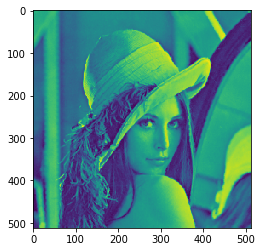

In [0]:
#Plotting Image
plt.imshow(lenaBilinear.astype(int))